<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>
 
<b>Group_ID: <code>3</code><b>
 
<b>Group Members:</b>  
 
1. <code><Sujahid Basha >B00925849</code>
2. <code><Hariesh Annadevara Sivakumar>B00965733</code>
3. <code><Venkatraman M>B00968227</code>
4. <code><Shubhangi Mahato>B00975934</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> Android Malware Detection </code></h4>
<h4> Link to the Dataset: <code>https://www.kaggle.com/datasets/joebeachcapital/tuandromd/code</code> </h4>
<h4> Dataset Description: </h4>
<code>TUNADROMD dataset contains 4465 instances and 241 attributes. The target attribute for classification is a category (malware vs goodware). (N.B. This is the preprocessed version of TUANDROMD). The Variables are permission-based features and API based features. Whereas class labels are Malware and Goodware </code>


# 2. Task Information 

<h4> Task Goal: This task aims to distinguish between malware and goodware in android using various ML Algorithms </h4>
<h4> Task Description: </h4>
    The dataset used here is Tunadromd which provides the results wheather android is affected ny a malware or not. Some of the features are ACCESS_ALL_DOWNLOADS, ACCESS_CHECKIN_PROPERTIES, ACCESS_COARSE_UPDATES, ACCOUNT_MANAGER, AUTHENTICATE_ACCOUNTS, BIND_NFC_SERVICE, BIND_VPN_SERVICE, CAPTURE_SECURE_VIDEO_OUTPUT, Lables and more. The models applied in dataset are Random Forest, Support Vector Machines, Logistic Regression and Naive Bayes.

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.datasets import make_classification
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv("TUANDROMD.csv")
df

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,goodware
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,goodware


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB


In [4]:
df['Label'].unique()

array(['malware', nan, 'goodware'], dtype=object)

In [5]:
df['Label'].value_counts()

Label
malware     3565
goodware     899
Name: count, dtype: int64

In [6]:
df['Label'] = df['Label'].replace({'malware' : 1 , 'goodware':0})
df['Label'].unique()

array([ 1., nan,  0.])

In [7]:
df.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [8]:
df.dropna(inplace=True)

<Axes: xlabel='Label', ylabel='Density'>

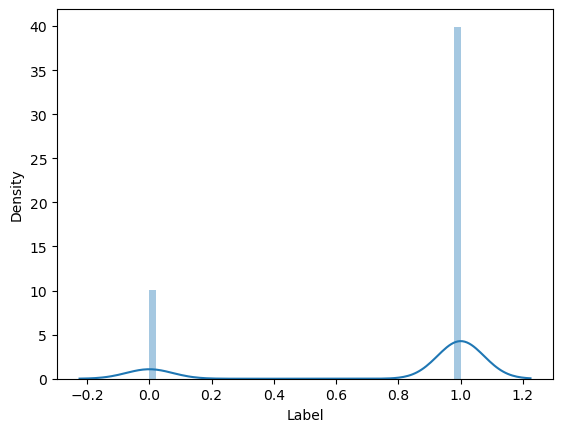

In [9]:
sns.distplot(df['Label'])

### 3.2 Model development and training 

In [10]:
X = df.drop('Label',axis=1)
y = df['Label']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### 3.3 Model evaluation

Random Forest Accuracy: 0.9932835820895523


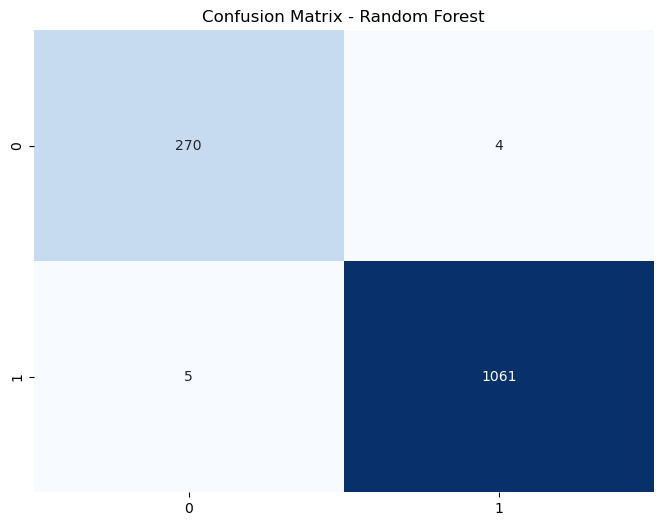

Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       274
         1.0       1.00      1.00      1.00      1066

    accuracy                           0.99      1340
   macro avg       0.99      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340



In [12]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, rf_predictions))

SVM Accuracy: 0.9805970149253731


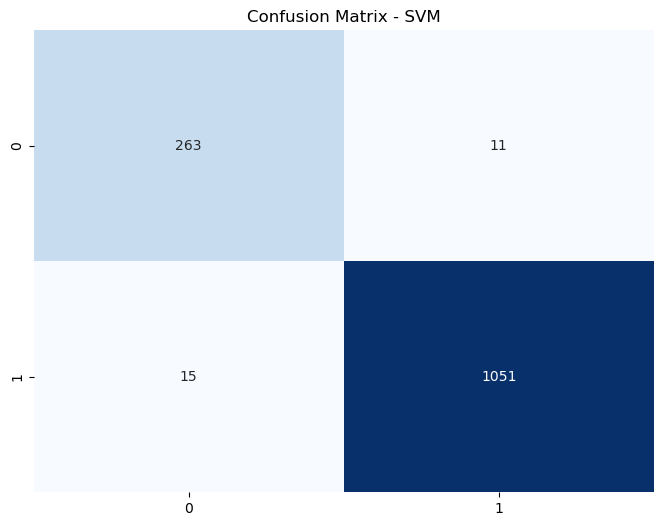

Classification Report - SVM:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       274
         1.0       0.99      0.99      0.99      1066

    accuracy                           0.98      1340
   macro avg       0.97      0.97      0.97      1340
weighted avg       0.98      0.98      0.98      1340



In [13]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification Report for SVM
print("Classification Report - SVM:")
print(classification_report(y_test, svm_predictions))

Naive Bayes Accuracy: 0.2537313432835821


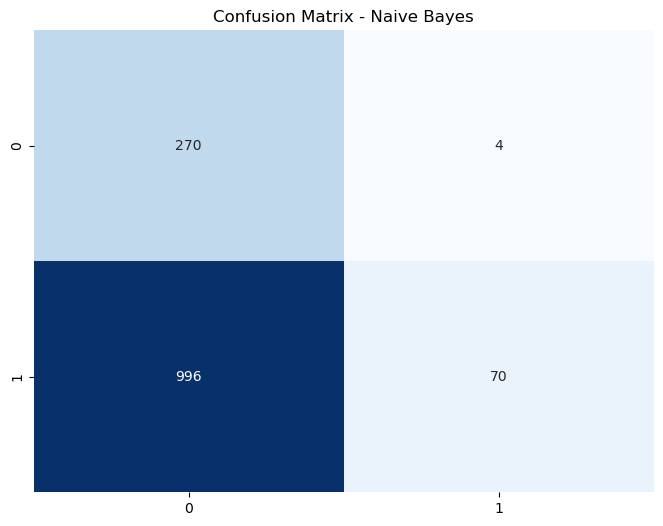

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.21      0.99      0.35       274
         1.0       0.95      0.07      0.12      1066

    accuracy                           0.25      1340
   macro avg       0.58      0.53      0.24      1340
weighted avg       0.80      0.25      0.17      1340



In [14]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

# Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Classification Report for Naive Bayes
print("Classification Report - Naive Bayes:")
print(classification_report(y_test, nb_predictions))

Logistic Regression Accuracy: 0.9798507462686568


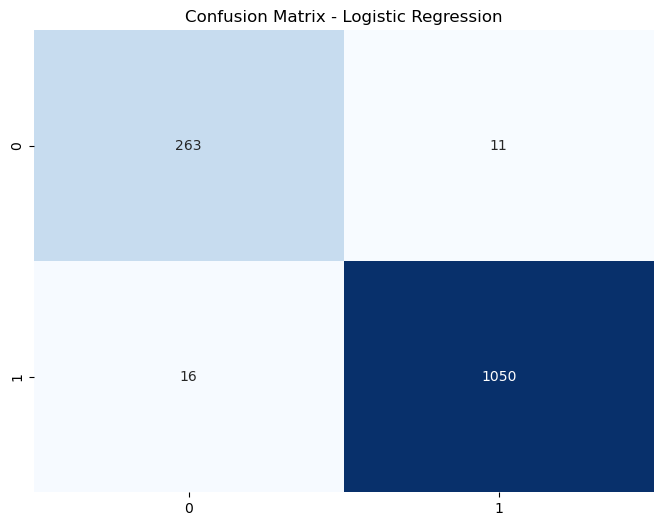

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       274
         1.0       0.99      0.98      0.99      1066

    accuracy                           0.98      1340
   macro avg       0.97      0.97      0.97      1340
weighted avg       0.98      0.98      0.98      1340



In [15]:
# Logistic Regression (for multi-class problems)
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification Report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, lr_predictions))

### 3.4 Analysis 

Plotting Roc-Auc curve

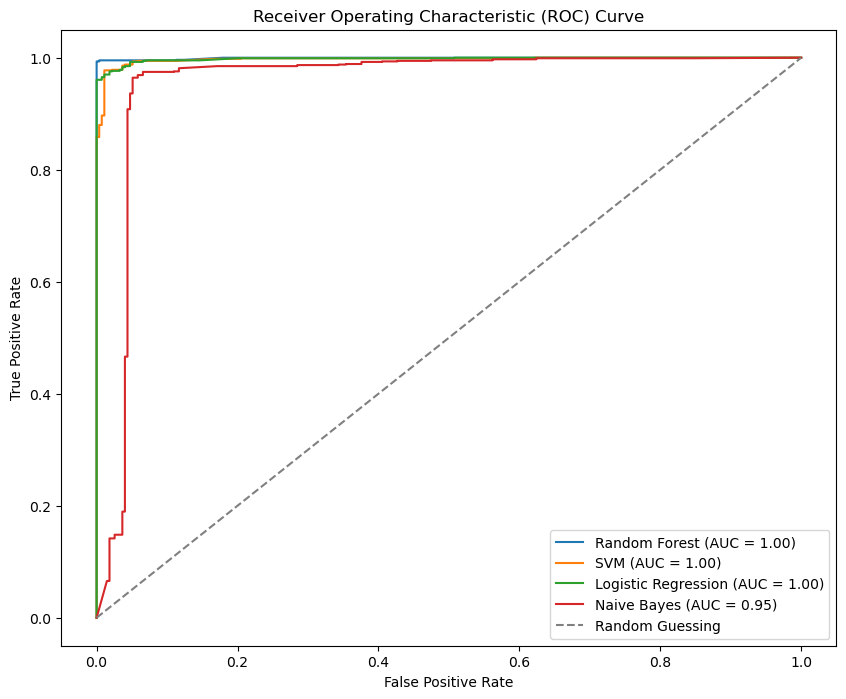

In [17]:

classifiers = [rf_model, svm_model, lr_model, nb_model]
classifier_names = ['Random Forest', 'SVM', 'Logistic Regression', 'Naive Bayes']

# Plot ROC curves
plt.figure(figsize=(10, 8))

for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)
    
    # Check if the classifier has 'predict_proba' attribute
    if hasattr(classifier, 'predict_proba'):
        # Get predicted probabilities for the positive class
        y_score = classifier.predict_proba(X_test)[:, 1]
    else:
        # For classifiers without 'predict_proba', use decision function
        y_score = classifier.decision_function(X_test)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{classifier_names[i]} (AUC = {roc_auc:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Random Forest (RF), Support Vector Machine (SVM) and Logistic Regression (LF): An AUC-ROC of 0.1 suggests that the classifier has a 100% chance of correctly distinguishing between positive and negative classes. This is a high value, indicating good performance can also be termed to be overfitting.

Naive Bayes (NB): An AUC-ROC of 0.95 suggests that the Naive Bayes classifier has a 95% chance of correctly distinguishing between positive and negative classes. indicating a moderate performance.